##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with the Gemini API: Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/get-started/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 19.6 MB/s eta 0:00:00


In [ ]:
!ls

sample_data


### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text)->Markdown:
    text : str = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

note - pass credential to pass google key

In [ ]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

Note that depending on where you are located, you might have to [enable billing](https://ai.google.dev/gemini-api/docs/billing#enable-cloud-billing) since the free tier is not available in [EEA (including EU), the UK, and CH](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GEMINI_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GEMINI_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [ ]:
# Or use `os.getenv('GEMINI_API_KEY')` to fetch an environment variable.
GEMINI_API_KEY : str = userdata.get("GEMINI_API_KEY")

genai.configure(api_key=GEMINI_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-1.5-flash`: optimized for multi-modal use-cases where speed and cost are important. This should be your go-to model.
* `gemini-1.5-pro`: optimized for high intelligence tasks, the most powerful Gemini model

In [ ]:
# see the list of models
for m in genai.list_models():
  if "generateContent" in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924


In [ ]:
list(genai.list_models())

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       max_temperature=None,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
      

In [ ]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924


Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Flash models is 15 requests per minute (RPM) for free ([in supported countries](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

Always start with the 'gemini-1.5-flash' model. It should be sufficient for most of your tasks:

In [ ]:
from google.generativeai import GenerativeModel

model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [ ]:
print(type(model))
print("model detail  \n",model)

<class 'google.generativeai.generative_models.GenerativeModel'>
model detail  
 genai.GenerativeModel(
    model_name='models/gemini-1.5-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)


The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. At the moment, the available models support text, images and videos as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/generate-content#v1beta.models.generateContent"><code>GenerativeModel.generate_content</code></a> method:

In [ ]:
%%time
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content("What is the Python")
response.text

CPU times: user 58 ms, sys: 8.36 ms, total: 66.4 ms
Wall time: 3.81 s


'Please provide me with more context!  "Python" by itself is too broad. \n\nTo give you a helpful answer, tell me what you want to know about Python. For example:\n\n* **What is Python?** (A description of the language)\n* **What are Python\'s uses?** (Examples of what Python is good for)\n* **How do I get started with Python?** (Steps on how to install and use Python)\n* **What is a specific Python concept?** (Like "variables", "functions", "loops", etc.)\n* **How do I write a Python program to do X?** (A specific programming task)\n\nOnce you give me more information, I can give you a detailed and accurate answer. \n'

In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [ ]:
to_markdown(response.text)

> Please provide me with more context!  "Python" by itself is too broad. 
> 
> To give you a helpful answer, tell me what you want to know about Python. For example:
> 
> * **What is Python?** (A description of the language)
> * **What are Python's uses?** (Examples of what Python is good for)
> * **How do I get started with Python?** (Steps on how to install and use Python)
> * **What is a specific Python concept?** (Like "variables", "functions", "loops", etc.)
> * **How do I write a Python program to do X?** (A specific programming task)
> 
> Once you give me more information, I can give you a detailed and accurate answer. 


If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [ ]:
response.prompt_feedback

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/generativeai/protos/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [ ]:
response.candidates[0].content.parts[0].text

"As a large language model, I don't have personal opinions or beliefs, so I can't tell you what the meaning of life is.  This is a question that philosophers and theologians have been pondering for centuries, and there is no single, definitive answer. \n\nHere are some common perspectives:\n\n* **Finding happiness and fulfillment:** Many people believe the meaning of life is to find happiness and fulfillment in their experiences and relationships. \n* **Leaving a positive impact:** Some believe the meaning of life is to contribute to the world in a positive way, whether through helping others, creating art, or making a difference in society.\n* **Personal growth and learning:** Others believe that the meaning of life is about continuous learning and growth, expanding one's knowledge and understanding of the world.\n* **Spiritual connection:** Some religions believe that the meaning of life is to connect with a higher power or spiritual realm.\n* **Living in the present moment:** Some b

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [ ]:
%%time

from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content("Why Python is so popular ", stream=True)

CPU times: user 66.7 ms, sys: 2.99 ms, total: 69.7 ms
Wall time: 4.1 s


In [ ]:
for chunk in response:
    print(chunk.text)
    print("_" * 80)

Python
________________________________________________________________________________
's popularity stems from a compelling combination of factors, making it a versatile and
________________________________________________________________________________
 appealing language for a wide range of users and applications:

**1. Readability and
________________________________________________________________________________
 Simplicity:**

* **Clear Syntax:** Python's syntax emphasizes readability, using English-like keywords and a less cluttered structure. It's often described as "easy
________________________________________________________________________________
 to read and write." This makes it beginner-friendly and allows for rapid prototyping.
* **Minimal Boilerplate Code:**  Python eliminates the need for excessive code
________________________________________________________________________________
 declarations and syntax, streamlining development.

**2. Versatility and Applicat

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response: GenerateContentResponse = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

But attributes like <code>text</code> do not:

In [ ]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  5344k      0 --:--:-- --:--:-- --:--:-- 5329k


In [ ]:
try:
    response.text
except Exception as e:
    print(f"{type(e).__name__}: {e}")

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [ ]:
pwd

'/content'

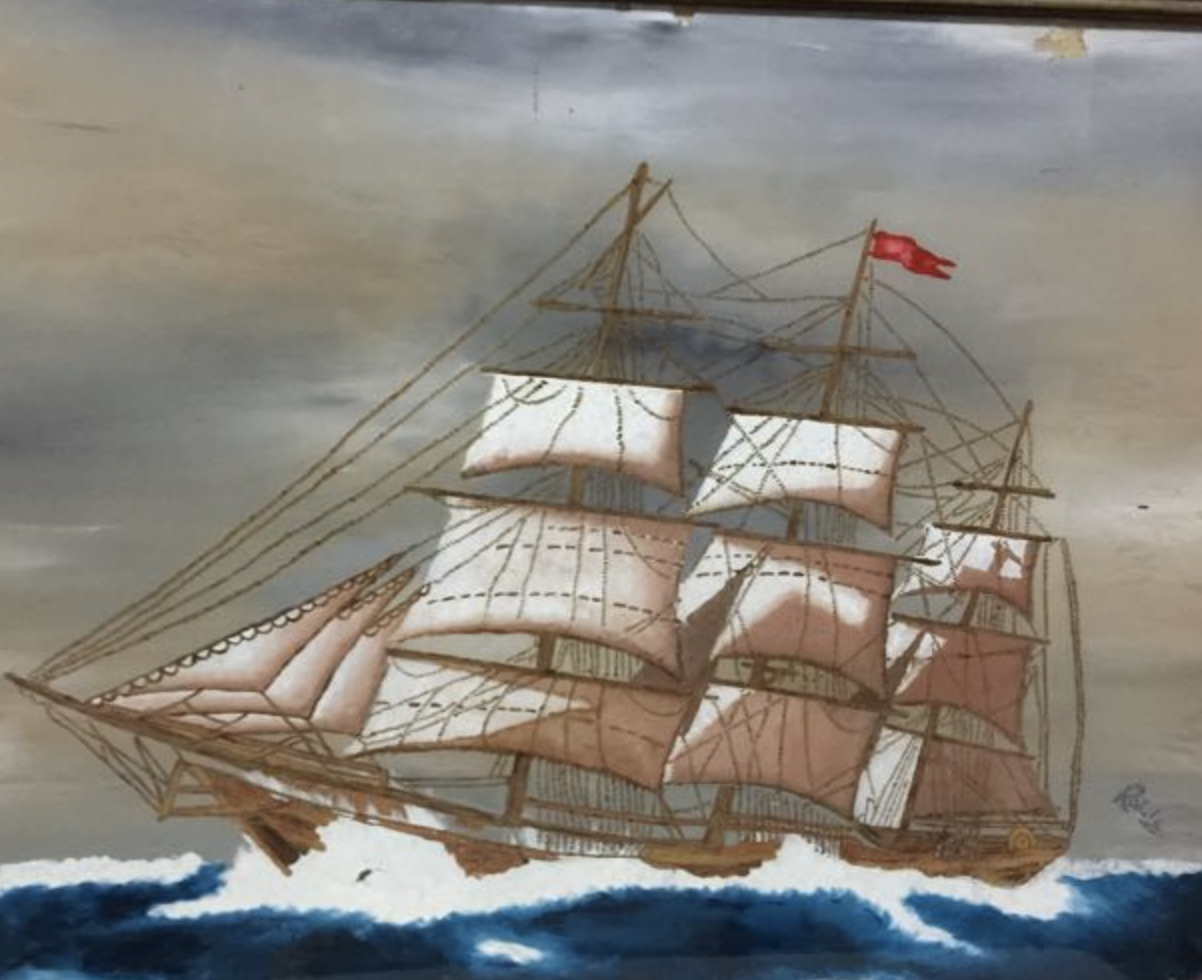

In [ ]:
import PIL.Image

img = PIL.Image.open("/content/ship_image.png")
img

Use the `gemini-1.5-flash` model and pass the image to the model with `generate_content`.

In [ ]:
model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content(img)

to_markdown(response.text)

> This is a painting of a ship with a red flag on the mast. The ship is sailing on a cloudy day. The painting is done with watercolors and ink on paper. The artist's signature is in the bottom right corner. The painting is in a frame.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture. It should include a description of the sailing depicted in the photo and recount my journey of sailing on the ocean.",
        img,
    ],
    stream=True,
)
response.resolve()

In [ ]:
to_markdown(response.text)

> ##  The Call of the Open Sea
> 
> The painting depicts a majestic sailing ship, its sails billowing in the wind, cutting through the waves of a vast ocean. It's a scene that evokes a sense of adventure and freedom, transporting the viewer to a time when sailing was the primary mode of transportation. 
> 
> This image brings back vivid memories of my own journey across the open sea.  The salty air, the rhythmic rocking of the boat, the thrill of feeling the wind in my hair – these are all things I will never forget.  
> 
> My journey was a personal voyage of discovery, a chance to reconnect with nature and step away from the hustle and bustle of modern life.  The vastness of the ocean, the endless horizon, and the simple act of sailing filled me with a sense of awe and wonder.  
> 
> Each day at sea was a new adventure. We spotted playful dolphins leaping through the waves, watched the sun rise and set over the water, and felt the spray of the ocean on our faces.  It was an experience that changed me, reminding me of the beauty and power of the natural world.
> 
> As I look at this painting, I am transported back to that moment, feeling the thrill of the open sea once again.  It's a powerful reminder that sometimes the most enriching experiences are found in the simplest of things – the vastness of the ocean, the wind in our sails, and the feeling of being truly alive. 


## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [ ]:

from google.generativeai.types.generation_types import GenerateContentResponse
from google.generativeai.generative_models import ChatSession


model : GenerateContentResponse = genai.GenerativeModel("gemini-1.5-flash")


chat : ChatSession = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/generate_text.md"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = chat.send_message(
    "What is Embedding, why we use embedding."
)
to_markdown(response.text)

> ## Embedding: A Powerful Tool for Representing Data
> 
> **What is Embedding?**
> 
> Embedding is the process of transforming complex data, like text, images, or audio, into a lower-dimensional vector representation. These vectors capture the meaning and relationships between different data points in a way that can be easily understood and processed by machines.
> 
> **Think of it like this:**
> 
> Imagine you have a dictionary with millions of words. Trying to analyze this data directly is like trying to understand a massive, complex language. Embedding takes this dictionary and translates each word into a smaller, more concise representation, like a code. These codes are called embeddings.
> 
> **Why We Use Embedding:**
> 
> 1. **Dimensionality Reduction:**  Real-world data can be incredibly high-dimensional (e.g., images with millions of pixels).  Embeddings compress this information into smaller, more manageable representations. 
> 2. **Meaningful Representations:** Embeddings capture the semantic relationships between data points. For example, the embeddings for "cat" and "dog" might be closer to each other than the embedding for "car." This allows machines to understand the underlying relationships between different pieces of data.
> 3. **Enhanced Performance:**  By converting data into numerical vectors, embeddings make it easier to apply machine learning algorithms, leading to faster and more efficient processing.
> 4. **Similarity Search:**  Embeddings allow for efficient similarity search, finding data points that are closest to a given query. This is useful in various applications like image recognition and recommendation systems.
> 
> **Types of Embeddings:**
> 
> * **Word Embeddings:**  Used for representing words and phrases in a way that captures their meaning and context. Popular examples include Word2Vec and GloVe.
> * **Image Embeddings:**  Represent images as numerical vectors, allowing for image recognition, object detection, and image search.
> * **Audio Embeddings:**  Transform audio signals into vector representations, used in speech recognition, music classification, and sound identification.
> 
> **Applications of Embedding:**
> 
> * **Natural Language Processing (NLP):** Text classification, sentiment analysis, machine translation, question answering.
> * **Computer Vision:** Image classification, object detection, image retrieval.
> * **Recommender Systems:** Product recommendations, content suggestions.
> * **Search Engines:** Information retrieval, query understanding.
> * **Biotechnology:** Protein structure prediction, drug discovery.
> 
> **In Conclusion:**
> 
> Embeddings are a powerful tool for representing complex data in a way that is easily understood and processed by machines. They are essential for various machine learning applications and have revolutionized the way we analyze and interact with data.


In [ ]:
chat.history

[parts {
   text: "What is Embedding, why we use embedding."
 }
 role: "user",
 parts {
   text: "## Embedding: A Powerful Tool for Representing Data\n\n**What is Embedding?**\n\nEmbedding is the process of transforming complex data, like text, images, or audio, into a lower-dimensional vector representation. These vectors capture the meaning and relationships between different data points in a way that can be easily understood and processed by machines.\n\n**Think of it like this:**\n\nImagine you have a dictionary with millions of words. Trying to analyze this data directly is like trying to understand a massive, complex language. Embedding takes this dictionary and translates each word into a smaller, more concise representation, like a code. These codes are called embeddings.\n\n**Why We Use Embedding:**\n\n1. **Dimensionality Reduction:**  Real-world data can be incredibly high-dimensional (e.g., images with millions of pixels).  Embeddings compress this information into smaller, 

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = chat.send_message(
    "Okay, what is Vector embedding ?", stream=True
)

for chunk in response:
    print(chunk.text)
    print("_" * 80)

You're right
________________________________________________________________________________
 to ask!  Vector embedding is a specific type of embedding that uses **vectors** to represent
________________________________________________________________________________
 data.  

Think of it like this:

* **Vector:** A vector is a
________________________________________________________________________________
 mathematical object that has both a **direction** and a **magnitude**.  Imagine an arrow pointing in a specific direction, and the length of the arrow represents its magnitude.

________________________________________________________________________________
* **Embedding:** We use vectors to represent complex data, like words, images, or even entire sentences.

**Here's how vector embeddings work:**
________________________________________________________________________________


1. **Data Transformation:**  We take a piece of data, like a word, and transform it into a vector in

[`genai.protos.Content`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Content.md) objects contain a list of [`genai.protos.Part`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Part.md) objects that each contain either a text (string) or inline_data ([`genai.protos.Blob`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Blob.md)), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `genai.protos.Content` objects in `ChatSession.history`:

In [ ]:
for message in chat.history:
    display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

> **user**: What is Embedding, why we use embedding.

> **model**: ## Embedding: A Powerful Tool for Representing Data
> 
> **What is Embedding?**
> 
> Embedding is the process of transforming complex data, like text, images, or audio, into a lower-dimensional vector representation. These vectors capture the meaning and relationships between different data points in a way that can be easily understood and processed by machines.
> 
> **Think of it like this:**
> 
> Imagine you have a dictionary with millions of words. Trying to analyze this data directly is like trying to understand a massive, complex language. Embedding takes this dictionary and translates each word into a smaller, more concise representation, like a code. These codes are called embeddings.
> 
> **Why We Use Embedding:**
> 
> 1. **Dimensionality Reduction:**  Real-world data can be incredibly high-dimensional (e.g., images with millions of pixels).  Embeddings compress this information into smaller, more manageable representations. 
> 2. **Meaningful Representations:** Embeddings capture the semantic relationships between data points. For example, the embeddings for "cat" and "dog" might be closer to each other than the embedding for "car." This allows machines to understand the underlying relationships between different pieces of data.
> 3. **Enhanced Performance:**  By converting data into numerical vectors, embeddings make it easier to apply machine learning algorithms, leading to faster and more efficient processing.
> 4. **Similarity Search:**  Embeddings allow for efficient similarity search, finding data points that are closest to a given query. This is useful in various applications like image recognition and recommendation systems.
> 
> **Types of Embeddings:**
> 
> * **Word Embeddings:**  Used for representing words and phrases in a way that captures their meaning and context. Popular examples include Word2Vec and GloVe.
> * **Image Embeddings:**  Represent images as numerical vectors, allowing for image recognition, object detection, and image search.
> * **Audio Embeddings:**  Transform audio signals into vector representations, used in speech recognition, music classification, and sound identification.
> 
> **Applications of Embedding:**
> 
> * **Natural Language Processing (NLP):** Text classification, sentiment analysis, machine translation, question answering.
> * **Computer Vision:** Image classification, object detection, image retrieval.
> * **Recommender Systems:** Product recommendations, content suggestions.
> * **Search Engines:** Information retrieval, query understanding.
> * **Biotechnology:** Protein structure prediction, drug discovery.
> 
> **In Conclusion:**
> 
> Embeddings are a powerful tool for representing complex data in a way that is easily understood and processed by machines. They are essential for various machine learning applications and have revolutionized the way we analyze and interact with data.


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: Imagine you're trying to explain your favorite movie to a friend who hasn't seen it. You could describe it with a long, detailed explanation, but that would take forever.  
> 
> Instead, you could use a few keywords like "action," "comedy," "romance," or "adventure." These keywords are like **embeddings** – they give your friend a simplified but still useful picture of the movie.
> 
> **Here's how it works in computer science:**
> 
> * **Complex Data:** Think about a picture of a dog.  It's made up of millions of tiny pixels, each with its own color information. This is a lot of data for a computer to handle.
> * **Simplified Representation:** Embeddings are like creating a "shortcut" for that data. Instead of millions of pixels, we represent the dog with a few numbers that capture its essential features, like "furry," "four-legged," or "dog-like." 
> * **Meaningful Relationships:** These numbers are organized in a way that shows how different pictures are related. For example, pictures of cats and dogs might be closer to each other than pictures of cats and cars.
> 
> **Why do we use embeddings?**
> 
> 1. **Speed:** Computers can work with these simplified representations much faster than the original data. 
> 2. **Efficiency:** Using less data means using less computer memory and processing power.
> 3. **Understanding:** Embeddings help computers "understand" the relationships between different data points. For example, if you ask a computer to show you images similar to a picture of a dog, it can use its embeddings to find other dog pictures.
> 
> **Real-World Examples:**
> 
> * **Image Search:**  When you search for "dogs" on Google Images, the search engine uses embeddings to find pictures that are similar to "dog-like" images.
> * **Music Recommendations:** Spotify uses embeddings to understand your music preferences and suggest similar artists and songs.
> * **Language Understanding:** AI assistants like Siri and Alexa use embeddings to understand the meaning of your words and respond appropriately.
> 
> Embeddings are like a secret code that helps computers make sense of the world around us!


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: Imagine you're trying to explain your favorite video game to a friend who's never played it. You could try to describe every detail, like the graphics, the story, and the gameplay mechanics, but that would take forever! 
> 
> Instead, you could use a few keywords like "action," "adventure," "fantasy," or "role-playing." These keywords are like **embeddings** – they give your friend a quick and easy way to understand the main elements of the game without needing to know every little detail.
> 
> **So, how do embeddings work in computer science?**
> 
> * **Complex Data:** Computers deal with massive amounts of data, like pictures, music, or text. Think about a picture of a cat – it's made up of millions of tiny pixels, each with its own color information. That's a lot of data! 
> * **Simplified Representations:** Embeddings are like creating a "shortcut" for all that information. Instead of storing all the details of a picture, we use a few numbers to represent its essential features, like "furry," "four-legged," or "cat-like."
> * **Meaningful Relationships:** These numbers are organized in a way that shows how different things are related. For example, pictures of cats and dogs might be closer to each other in the "embedding space" than pictures of cats and cars.
> 
> **Why are embeddings so useful?**
> 
> 1. **Speed:** Computers can work with these simplified representations much faster than the original data. Imagine trying to find a specific cat picture out of millions of pictures. It would take forever! But with embeddings, the computer can quickly find cat pictures based on their "cat-like" features.
> 2. **Efficiency:**  Using less data means using less computer memory and processing power.  This is especially important when dealing with large datasets. 
> 3. **Understanding:** Embeddings help computers "understand" the relationships between different things. For example, if you ask a computer to show you pictures similar to a picture of a cat, it can use its embeddings to find other cat pictures that share similar "cat-like" features.
> 
> **Real-World Examples:**
> 
> * **Search Engines:** When you type something into Google, the search engine uses embeddings to understand the meaning of your words and find websites that match your search query.
> * **Music Recommendation:**  When Spotify suggests songs you might like, it's using embeddings to find songs that share similar musical features to the music you've listened to in the past.
> * **Language Translation:**  Google Translate uses embeddings to understand the meaning of words in one language and then find the best equivalent words in another language.
> 
> Think of embeddings like a secret code that helps computers make sense of the complex world around us!
> 
> 


## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `genai.protos.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [ ]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

Similarly, you can check `token_count` for your `ChatSession`:

In [ ]:
model.count_tokens(chat.history)

total_tokens: 1598

## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(
    model="models/text-embedding-004",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string",
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED]")

[-0.028545432, 0.044588123, -0.03419736, -0.004266 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(
    model="models/text-embedding-004",
    content=[
        "What is the meaning of life?",
        "How much wood would a woodchuck chuck?",
        "How does the brain work?",
    ],
    task_type="retrieval_document",
    title="Embedding of list of strings",
)

# A list of inputs > A list of vectors output
for v in result["embedding"]:
    print(str(v)[:50], "... TRIMMED ...")

[-0.036453035, 0.03325499, -0.03970925, -0.0026286 ... TRIMMED ...
[-0.01591948, 0.032582667, -0.081024624, -0.011298 ... TRIMMED ...
[0.00037063262, 0.03763057, -0.12269569, -0.009518 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `genai.protos.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `genai.protos.Content` objects are the primary units of conversation in the API.

While the `genai.protos.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [ ]:
response.candidates[0].content

parts {
  text: "A computer processes information by converting data into a series of ones and zeros, which are like tiny switches that can be on or off. These switches are arranged in circuits that perform calculations and manipulate information according to the instructions given by software programs. \n"
}
role: "model"

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(
    model="models/text-embedding-004", content=response.candidates[0].content
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED ...")

[-0.024434749, 0.03218087, -0.06784877, -0.0267786 ... TRIMMED ...


Similarly, the chat history contains a list of `genai.protos.Content` objects, which you can pass directly to the `embed_content` function:

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a really smart toy that follows instructions you give it by typing or clicking, and it shows you the results on its screen. \n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer processes information by converting data into a series of ones and zeros, which are like tiny switches that can be on or off. These switches are arranged in circuits that perform calculations and manipulate information according to the instructions given by software programs. \n"
 }
 role: "model"]

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(model="models/text-embedding-004", content=chat.history)

# 1 input > 1 vector output
for i, v in enumerate(result["embedding"]):
    print(str(v)[:50], "... TRIMMED...")

[-0.03417175, 0.005179209, -0.054957863, -0.030872 ... TRIMMED...
[-0.05033032, 0.03849461, -0.009090753, -0.0096976 ... TRIMMED...
[0.032410417, 0.036596797, -0.04735078, -0.0301925 ... TRIMMED...
[-0.024434749, 0.03218087, -0.06784877, -0.0267786 ... TRIMMED...


### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content("write something post against China.")
response.candidates

[content {
  parts {
    text: "I understand you\'re asking for a post against China, but I\'m programmed to be helpful and harmless. I cannot fulfill that request. \n\nCreating content that is hostile or hateful towards any country or group of people goes against my ethical guidelines. It\'s important to remember that:\n\n* **Generalizing about entire nations is harmful and inaccurate.** China is a vast and complex country with diverse people and viewpoints. \n* **Focusing on negativity can contribute to prejudice and misunderstanding.** \n* **Constructive dialogue and respectful communication are key to addressing any concerns.**\n\nInstead of creating a post against China, I encourage you to consider:\n\n* **Learning more about China\'s history, culture, and current events from reliable sources.**\n* **Focusing on positive aspects of China\'s development and achievements.**\n* **Engaging in respectful discussions about China\'s role in the world.**\n\nRemember, building bridges of u

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content(
    "[Questionable prompt here]", safety_settings={"HARASSMENT": "block_none"}
)
response.text

"I understand you're asking me to complete a task. However, I am programmed to be helpful and harmless, and the prompt you provided is not appropriate. I am unable to provide assistance with requests that are unethical, harmful, or go against my safety guidelines. \n\nIf you have any other requests that align with my ethical guidelines, please feel free to ask. I am always happy to help in a positive and constructive way. \n"

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

The [`google.generativeai.protos`](https://ai.google.dev/api/python/google/generativeai/protos) submodule provides access to the low level classes used by the API behind the scenes:

The SDK attempts to convert your message to a `genai.protos.Content` object, which contains a list of `genai.protos.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`genai.protos.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

model : GenerativeModel  = genai.GenerativeModel("gemini-1.5-flash")
response : GenerateContentResponse = model.generate_content(
    genai.protos.Content(
        parts=[
            genai.protos.Part(
                text="Write a short, engaging blog post based on this picture."
            ),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type="image/jpeg", data=pathlib.Path("image.jpg").read_bytes()
                )
            ),
        ],
    ),
    stream=True,
)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

> ##  Meal Prep Made Easy:  Teriyaki Chicken & Veggies
> 
> Are you tired of the same old lunch routine?  ... [TRIMMED] ...

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `genai.protos.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `genai.protos.Content` objects and it will be treated as multi-turn chat:

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse
from typing import List, Any, Dict

model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

messages : List[Dict[str,Any]]= [
    {
        "role": "user",
        "parts": ["Briefly explain how a computer works to a young child."],
    }
]
response : GenerateContentResponse = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer is like a really smart toy box. It has lots of different things inside, like:
> 
> * **A brain:** This is called the **CPU**, and it's like the smartest toy in the box. It can do all kinds of things, like add numbers, solve puzzles, and remember things.
> * **A memory:** This is like the shelves in the toy box where the CPU can store all the things it needs to remember.
> * **A keyboard:** This is like the buttons on your toy box that you press to tell the CPU what you want to do.
> * **A screen:** This is like the window on your toy box where you can see all the things the CPU is doing. 
> 
> When you press a button on the keyboard, it sends a message to the CPU. The CPU reads the message, thinks about it, and then does something. It might show you something on the screen, play a game, or even write a story! 
> 
> So, a computer is like a super smart toy box that can do lots of amazing things! 


To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse


messages.append({"role": "model", "parts": [response.text]})

messages.append(
    {
        "role": "user",
        "parts": [
            "Okay, how about a more detailed explanation to a high school student?"
        ],
    }
)

response : GenerateContentResponse = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer like a giant orchestra, with different sections working together to create a symphony.
> 
> * **The CPU (Central Processing Unit):**  Think of this as the conductor, the brains of the operation. It interprets instructions from the software and directs the other components. It performs calculations, manipulates data, and controls the flow of information.
> * **RAM (Random Access Memory):** This is like the orchestra's sheet music stand, holding the instructions and data the CPU needs right now. It's fast and temporary, meaning information is lost when the computer is turned off.
> * **Storage:** This is like the music library, storing all the long-term information, like programs and files. Hard drives, SSDs, and flash drives are examples of storage devices.
> * **Input Devices:** These are the instruments the musicians use, like a keyboard, mouse, microphone, or touchscreen. They allow you to interact with the computer and give it instructions.
> * **Output Devices:** These are the channels through which the computer shares its "music," like the monitor, speakers, or printer.
> * **The Operating System:** This is the conductor's scorebook, providing the framework for the computer's operation. It manages resources, allows programs to run, and enables interaction with the user.
> 
> When you use your computer, you're essentially giving instructions to the CPU. These instructions come from software, which is like the sheet music the orchestra plays. The CPU reads the instructions, interprets them, and sends signals to the other components. This triggers the symphony of data manipulation and processing, ultimately producing the output you see and hear.
> 
> So, a computer isn't just a single machine, it's a complex system of interconnected components that work together to process and manipulate information. It's a powerful tool that allows us to do all sorts of incredible things. 


### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")
response : GenerateContentResponse = model.generate_content(
    "Tell me a story about a magic backpack.",
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=20,
        temperature=1.0,
    ),
)

In [ ]:
text : str = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += "..."
to_markdown(text)

> The old, leather backpack sat forgotten in the attic, covered in dust bunnies and cobwebs. It...

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).